# Part 7 of Recipes: Variable Radius Link Ends

This page is primarily based on the following page at the Circos documentation site:



- [7. Variable Radius Link Ends](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 6 by clicking [here &#8592;](Recipes_Part6.ipynb).



----



8 --- Recipes
=============

7. Variable Radius Link Ends
----------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/variable_link_ends/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/variable_link_ends/images){.normal}
[Configuration](/documentation/tutorials/recipes/variable_link_ends/configuration){.normal}
:::

Using entries in the link data file, or rules, you can independently
manipulate the radial position of each end of a link. One application of
this is to move link ends out of the way of another data track.

This is done by setting `radius1` and `radius2` values, which are the
radial positions of the link ends associated with the first and second
data point, respectively.

The first way to achieve this is to associate a radius value with one or
both of the ends.

```ini
hs1 486 76975 hs15 100263879 100338121 radius1=0.5r
hs1 342608 393885 hs15 100218755 100268630 radius2=0.5r
hs1 576306 626811 hs15 100218755 100268630 radius=0.75r
```


Link ends for which radius is not defined will use the `radius` value
defined in the [\<link\>]{.syn-block} or [\<links\>]{.syn-block} blcok.

The second way to adjust radius values is to use a rule and set
`radius1` and `radius2` variables.

```ini
<rules>
```


```ini
# if a rule is triggered, continue testing with other rules
flow       = continue
```


```ini
# remap the color of the link to the first chromosome
<rule>
condition  = 1
color      = eval(sprintf("%s_a4",var(chr1)))
</rule>
```


```ini
# Alter radial position of one or both ends of a link, depending
# on its position. The function on(RX) tests whether a link
# is on a chromosome matching the regular expression RX.
```


```ini
# to/from hs1
<rule>
# the trailing $ (end of string anchor) is required so that 
# chromosome names like hs10, hs11, hs12, etc don't match
condition  = on(hs1$)
radius     = 0.85r
</rule>
```


```ini
# to hs10, hs11 or hs12
<rule>
condition  = to(hs1[012])
radius2    = 0.75r
</rule>
```


```ini
# from hs10, hs11, hs12
<rule>
condition  = from(hs1[012])
radius1    = 0.75r
</rule>
```


```ini
# from hs14 and has start beyond 100mb
<rule>
condition  = from(hs14) && var(start1) > 100mb
radius1    = 1r+50p
z          = 5
thickness  = 3
color      = blue
</rule>
```


```ini
# to hs5 and has end within 50mb of position 100mb
<rule>
condition  = to(hs5) && abs(var(start2) - 100mb) < 50mb
radius2    = 1r+50p
z          = 5
thickness  = 3
color      = red
</rule>
```


```ini
</rules>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/7/

/home/jovyan/circos-tutorials-0.67/tutorials/8/7


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.41s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/7
debuggroup summary 0.41s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.41s loading configuration from file circos.conf
debuggroup summary 0.41s found conf file circos.conf
debuggroup summary 0.59s debug will appear for these features: output,summary
debuggroup summary 0.59s bitmap output image ./circos.png
debuggroup summary 0.59s SVG output image ./circos.svg
debuggroup summary 0.59s parsing karyotype and organizing ideograms
debuggroup summary 0.71s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.72s applying global and local scaling
debuggroup summary 0.73s allocating image, colors and brushes
debuggroup summary 2.89s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.89s drawing highlights and ideograms
debuggroup summ

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

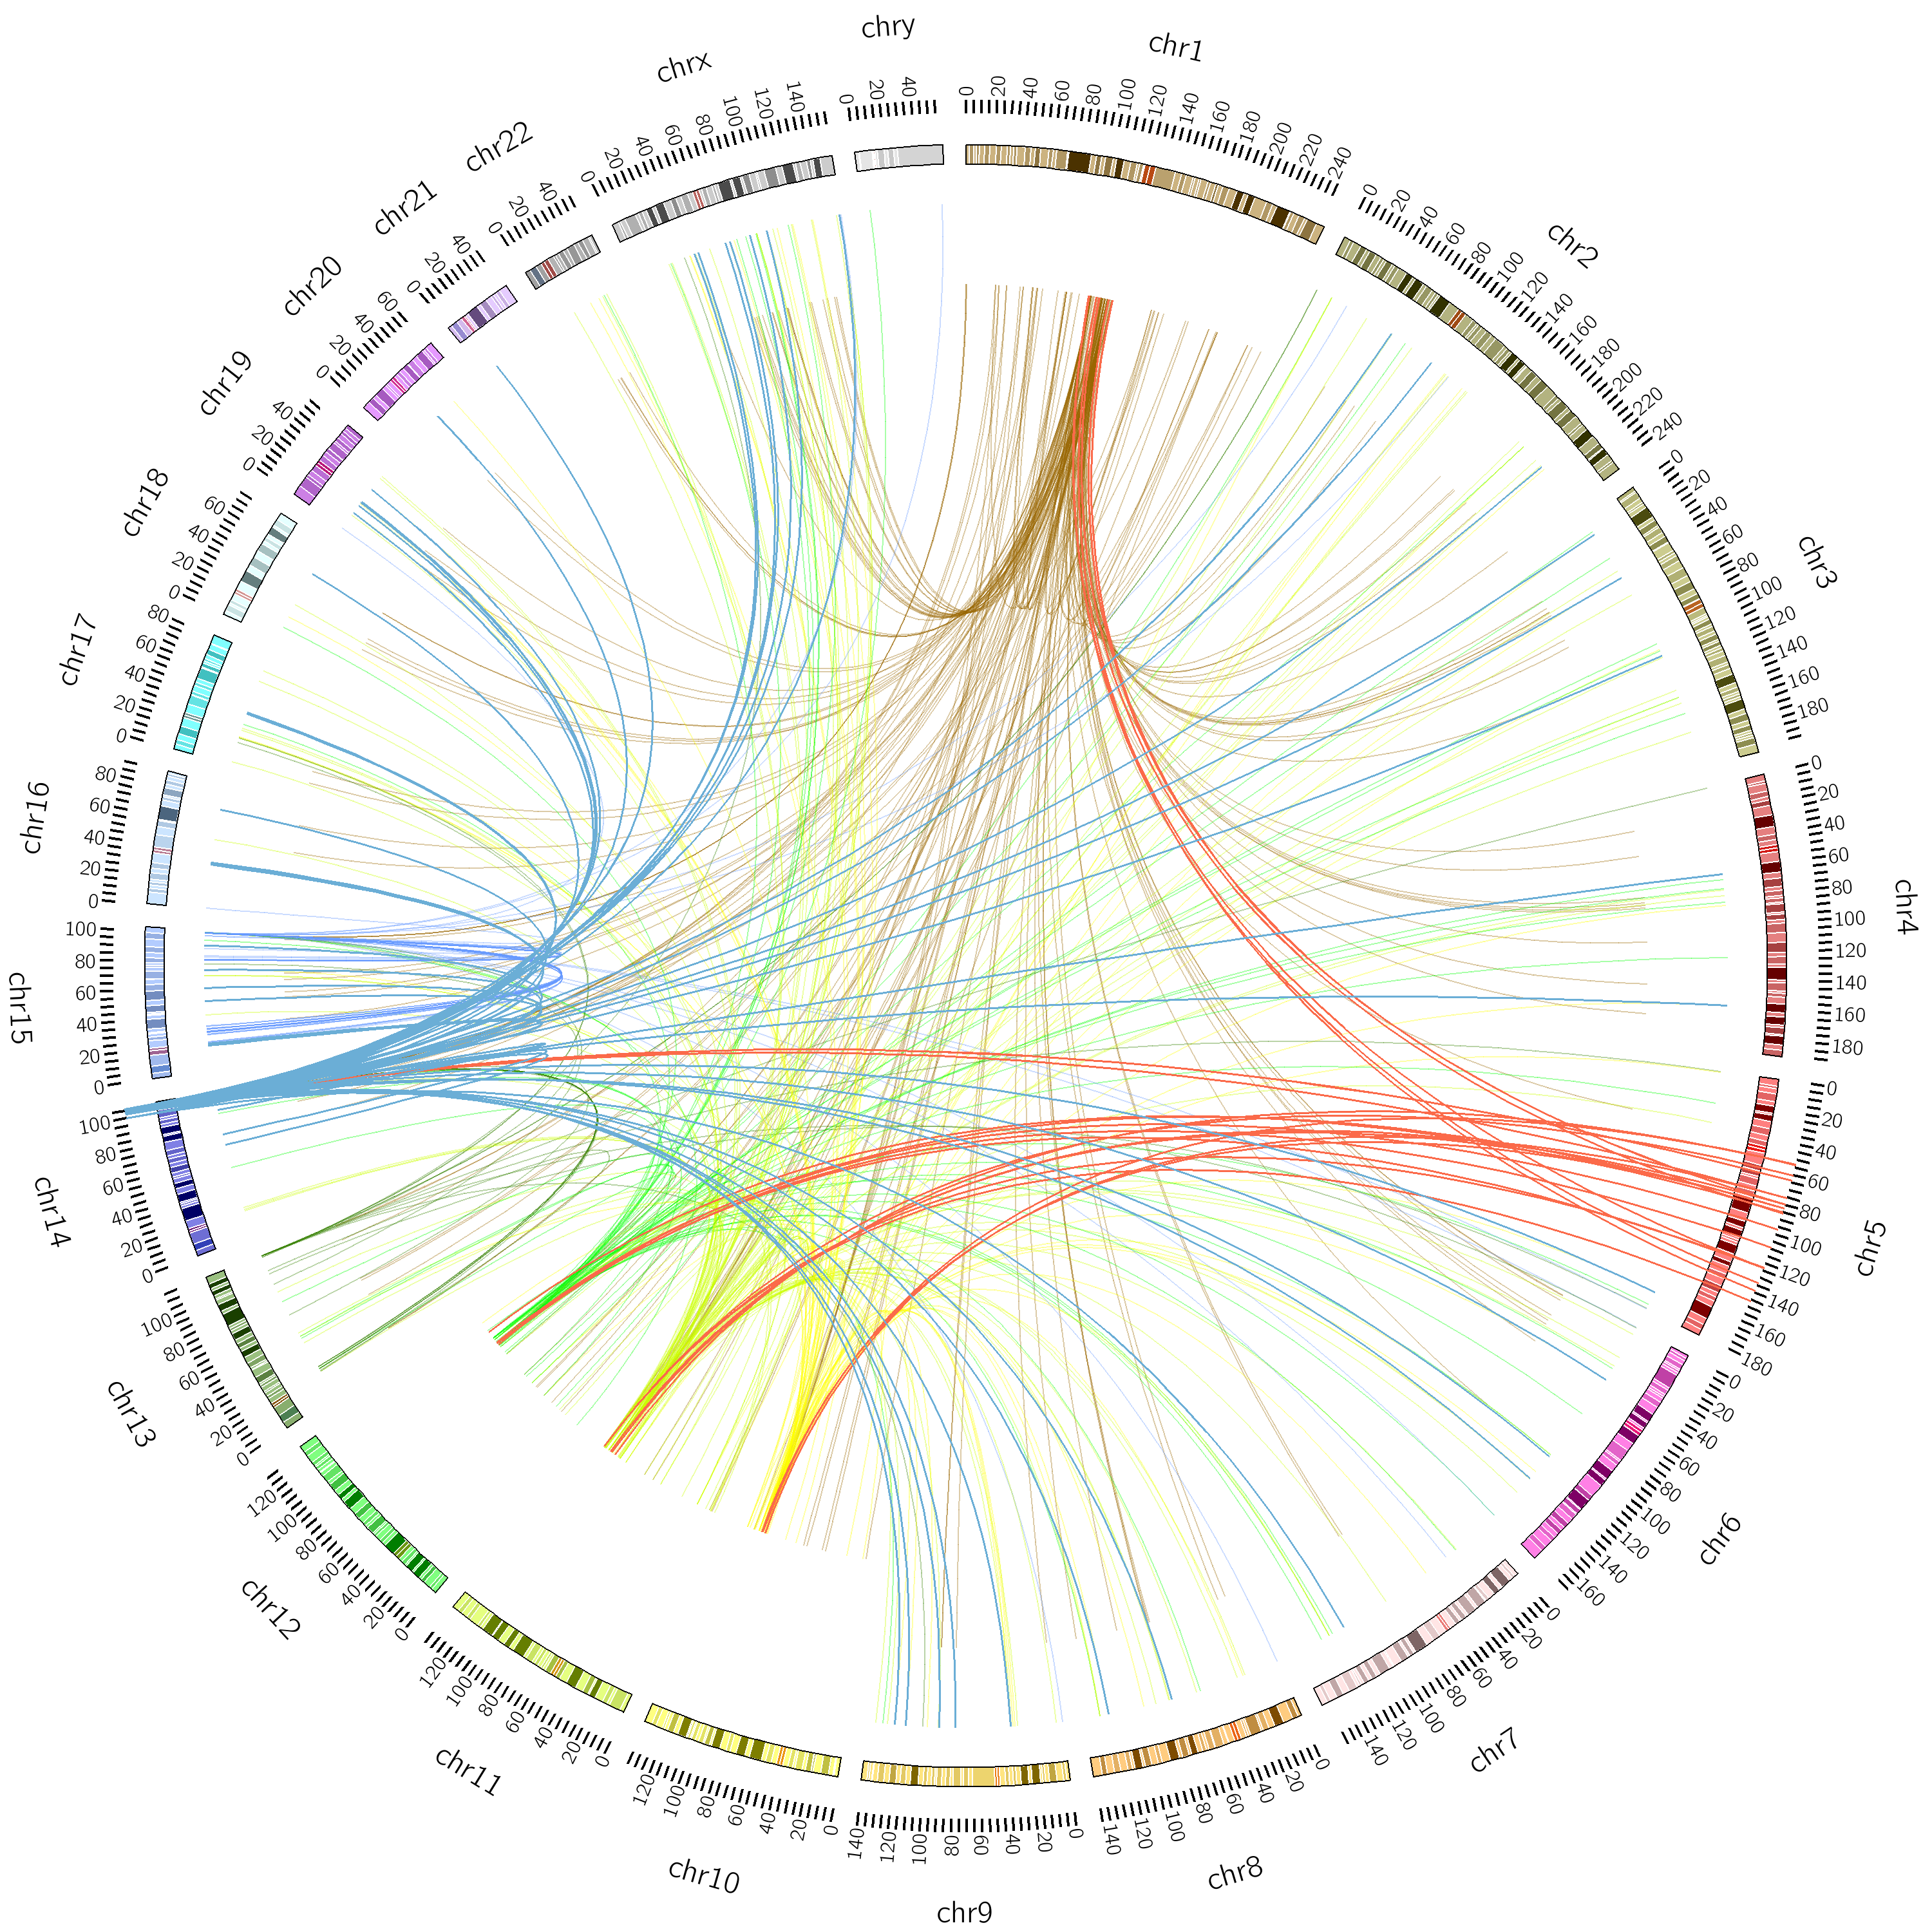

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part8.ipynb).

----